# Latent HGF: BA Project

In [24]:
import sys
from IPython.utils import io

In [25]:
# if 'google.colab' in sys.modules:

#   with io.capture_output() as captured:
#      ! pip install pyhgf watermark

In [ ]:
import arviz as az
import jax.numpy as jnp
import matplotlib.pyplot as plt
import pymc as pm
import numpy as np

from pyhgf import load_data
from pyhgf.distribution import HGFDistribution
from pyhgf.model import HGF, Network
from pyhgf.response import first_level_gaussian_surprise
from pyhgf.utils import beliefs_propagation
from pyhgf.updates.structure import add_parent


plt.rcParams["figure.constrained_layout.use"] = True

In [27]:
# Disable JIT compilation globally
# jax.config.update("jax_disable_jit", False) # True - If I want the compiler disabled.

In [28]:
timeserie = load_data("continuous")

# latent_hgf = (
#     Network()
#     .add_nodes(precision=1e4)
#     .add_nodes(precision=1e4, mean=timeserie[0], tonic_volatility=-13.0, value_children=0)
#     .add_nodes(precision=1e1, tonic_volatility=-2.0, volatility_children=0)
#     .add_nodes(precision=1e4, mean=timeserie[0], tonic_volatility=-13.0, value_children=1)
#     # .add_nodes(precision=1e1, tonic_volatility=-2.0, volatility_children=1)
#     # .add_nodes(precision=1e4, mean=timeserie[0], tonic_volatility=-13.0, value_children=2)
#     # .add_nodes(precision=1e1, tonic_volatility=-2.0, volatility_children=2)
# ).create_belief_propagation_fn()

latent_hgf = (
    Network()
    .add_nodes(precision=1e4)
    .add_nodes(precision=1e4, mean=timeserie[0], tonic_volatility=-13.0, value_children=0)
    .add_nodes(precision=1e1, tonic_volatility=-2.0, value_children=1)
    .add_nodes(precision=1e4, mean=timeserie[0], tonic_volatility=-13.0, value_children=0)
    # .add_nodes(precision=1e1, tonic_volatility=-2.0, volatility_children=1)
    # .add_nodes(precision=1e4, mean=timeserie[0], tonic_volatility=-13.0, value_children=2)
    # .add_nodes(precision=1e1, tonic_volatility=-2.0, volatility_children=2)
).create_belief_propagation_fn()

attributes, edges, update_sequence = (
    latent_hgf.get_network()
)

print(len(attributes))
print(len(edges))

5
4


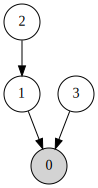

In [29]:
latent_hgf.plot_network()

In [33]:
attributes, edges, update_sequence = (
    latent_hgf.get_network()
)

latent_hgf_alt_attributes, latent_hgf_alt_edges = add_parent(attributes, edges, 3, 'volatility')

In [34]:
print(len(latent_hgf_alt_attributes))
print(len(latent_hgf_alt_edges))

6
5


In [35]:
latent_hgf.attributes = latent_hgf_alt_attributes
latent_hgf.edges = latent_hgf_alt_edges

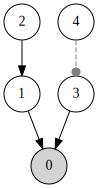

In [36]:
latent_hgf.plot_network() # Not sure why the plot function doesn't function with altered Attributes and Edges...